In [89]:
import pandas as pd 
import  numpy as np 
import keras
from keras import initializers
from tensorflow.keras.models import Model , Sequential 
from tensorflow.keras.layers import Dense , Input , Conv2D,Flatten,BatchNormalization,MaxPooling2D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [126]:
training_data = pd.read_csv('https://raw.githubusercontent.com/bwft-spotify-song-suggester-2/data-science/master/training_data.csv',index_col=0 )

In [127]:
# training_data['release_date'] = pd.to_datetime(training_data['release_date'],infer_datetime_format=True)

In [129]:
training_data

,cat_idx,album_lead_artist,album_name,release_date,total_tracks,track_artists,genres,artist_pop,id,duration_ms,explicit,name,popularity,track_number,acousticness,danceability,duration_ms.1,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,DaBaby,BLAME IT ON BABY,2020-04-17,13,DaBaby\nRoddy Ricch\n,north carolina hip hop\nrap\n,94,7ytR5pFWmSjzHJIeQkgog4,181733,True,ROCKSTAR (feat. Roddy Ricch),100,7,0.247,0.746,181733.0,0.690,0.000000,11,0.1010,-7.956,1,0.1640,89.977,4,0.497
1,0,Maroon 5,Nobody's Love,2020-07-24,1,Maroon 5\n,pop\npop rock\n,88,3kwgqoBqTwoAH4nT29TYrq,211254,False,Nobody's Love,78,1,0.310,0.486,211254.0,0.567,0.000000,1,0.0949,-6.456,1,0.0379,93.680,4,0.154
2,0,Harry Styles,Fine Line,2019-12-13,12,Harry Styles\n,pop\npost-teen pop\n,91,6UelLqGlWMcVH1E5c4H7lY,174000,False,Watermelon Sugar,95,2,0.122,0.548,174000.0,0.816,0.000000,0,0.3350,-4.209,1,0.0465,95.390,4,0.557
3,0,Taylor Swift,folklore,2020-07-24,16,Taylor Swift\n,dance pop\npop\n,96,4R2kfaDFhslZEMJqAFNpdd,239560,False,cardigan,87,2,0.537,0.613,239560.0,0.581,0.000345,0,0.2500,-8.588,0,0.0424,130.033,4,0.551
4,0,Jawsh 685,Savage Love (Laxed - Siren Beat),2020-06-09,1,Jawsh 685\nJason Derulo\n,NaN,84,5T490vvoFNU6psep0NPmxs,171375,False,Savage Love (Laxed - Siren Beat),87,1,0.243,0.795,171375.0,0.480,0.000000,3,0.2710,-8.556,1,0.0688,149.919,4,0.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34506,40,Favorite Kids Stories,"Storytime Classics, Vol. 3",2011-03-01,13,Favorite Kids Stories\n,children's story\n,37,42vkqry6wQqIEsTOwZ1Tlw,28573,False,Baa Baa Black Sheep,0,12,0.894,0.745,NaN,0.227,0.000094,8,0.1670,-9.928,0,0.8880,117.908,4,0.533
34507,40,Favorite Kids Stories,"Storytime Classics, Vol. 4",2011-03-01,13,Favorite Kids Stories\n,children's story\n,37,65MopnhsXOgYw4RuiA2pGU,497493,False,The Three Billy Goats Gruff,28,8,0.850,0.632,NaN,0.372,0.000000,7,0.1100,-8.760,1,0.9350,84.486,4,0.611
34508,40,Songs For Children,Time For Bed - 20 Kids Stories,2009-12-07,20,Songs For Children\n,nursery\n,52,7dALsbVmGkVMheCeBKY3OM,423107,False,The Story of the Frog Prince,14,11,0.731,0.529,NaN,0.102,0.000005,8,0.1770,-26.726,1,0.4820,131.498,3,0.553
34509,40,Songs For Children,Kids Bedtime Stories,2011-07-03,25,Songs For Children\n,nursery\n,52,6aVVXEn5Dd4z6gfBt6GEJo,531667,False,The Story Of The Pantomime Horse,17,12,0.910,0.723,NaN,0.161,0.000091,7,0.1450,-18.991,1,0.3700,111.303,4,0.723


In [130]:
training_data['duration_ms.1'] = training_data['duration_ms.1'].fillna(value=-1) 
training_data = training_data.fillna(value=('-')) 

In [131]:
training_data.isnull().sum()

cat_idx              0
album_lead_artist    0
album_name           0
release_date         0
total_tracks         0
track_artists        0
genres               0
artist_pop           0
id                   0
duration_ms          0
explicit             0
name                 0
popularity           0
track_number         0
acousticness         0
danceability         0
duration_ms.1        0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
mode                 0
speechiness          0
tempo                0
time_signature       0
valence              0
dtype: int64

In [163]:
model_data = training_data

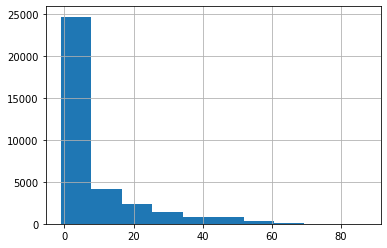

In [173]:
model_data.release_date = pd.to_datetime(model_data.release_date,yearfirst=True)
now = pd.to_datetime('now')
model_data['age'] = (now - model_data['release_date']).astype('<m8[Y]')
model_data.age.hist()
# dropping release date
model_data.drop(columns='release_date',inplace=True)

In [174]:
le = preprocessing.LabelEncoder()
le.fit(model_data['genres'])
model_data['genres'] = le.transform(model_data['genres'])

In [175]:


le.fit(model_data['album_lead_artist'])
model_data['album_lead_artist'] = le.transform(model_data['album_lead_artist'])

In [176]:
le.fit(model_data['album_name'])
model_data['album_name'] = le.transform(model_data['album_name'])

In [177]:
le.fit(model_data['track_artists'])
model_data['track_artists'] = le.transform(model_data['track_artists'])

In [178]:
le.fit(model_data['name'])
model_data['name'] = le.transform(model_data['name'])

In [179]:
le.fit(model_data['id'])
model_data['id'] = le.transform(model_data['id'])

In [180]:
model_data.track_artists

0         3307
1         9505
2         5964
3        13995
4         6801
         ...  
34506     4816
34507     4816
34508    13385
34509    13385
34510     4816
Name: track_artists, Length: 34511, dtype: int64

In [181]:
model_data

,cat_idx,album_lead_artist,album_name,total_tracks,track_artists,genres,artist_pop,id,duration_ms,explicit,name,popularity,track_number,acousticness,danceability,duration_ms.1,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,age
0,0,2566,1645,13,3307,6412,94,25673,181733,True,15363,100,7,0.247,0.746,181733.0,0.690,0.000000,11,0.1010,-7.956,1,0.1640,89.977,4,0.497,0.0
1,0,7254,12129,1,9505,6528,88,12481,211254,False,13582,78,1,0.310,0.486,211254.0,0.567,0.000000,1,0.0949,-6.456,1,0.0379,93.680,4,0.154,0.0
2,0,4559,5975,12,5964,6529,91,21451,174000,False,20988,95,2,0.122,0.548,174000.0,0.816,0.000000,0,0.3350,-4.209,1,0.0465,95.390,4,0.557,0.0
3,0,10722,20272,16,13995,3969,96,14749,239560,False,22271,87,2,0.537,0.613,239560.0,0.581,0.000345,0,0.2500,-8.588,0,0.0424,130.033,4,0.551,0.0
4,0,5234,14644,1,6801,0,84,18031,171375,False,16296,87,1,0.243,0.795,171375.0,0.480,0.000000,3,0.2710,-8.556,1,0.0688,149.919,4,0.723,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34506,40,3699,15978,13,4816,3215,37,13451,28573,False,1565,0,12,0.894,0.745,-1.0,0.227,0.000094,8,0.1670,-9.928,0,0.8880,117.908,4,0.533,9.0
34507,40,3699,15979,13,4816,3215,37,20058,497493,False,19365,28,8,0.850,0.632,-1.0,0.372,0.000000,7,0.1100,-8.760,1,0.9350,84.486,4,0.611,9.0
34508,40,10223,18144,20,13385,6448,52,24521,423107,False,19340,14,11,0.731,0.529,-1.0,0.102,0.000005,8,0.1770,-26.726,1,0.4820,131.498,3,0.553,10.0
34509,40,10223,9093,25,13385,6448,52,21760,531667,False,19335,17,12,0.910,0.723,-1.0,0.161,0.000091,7,0.1450,-18.991,1,0.3700,111.303,4,0.723,9.0


In [182]:
model_data = model_data.astype('float32')

In [183]:

train,val = train_test_split(model_data, test_size=0.2 )

In [184]:
model_data.dtypes

cat_idx              float32
album_lead_artist    float32
album_name           float32
total_tracks         float32
track_artists        float32
genres               float32
artist_pop           float32
id                   float32
duration_ms          float32
explicit             float32
name                 float32
popularity           float32
track_number         float32
acousticness         float32
danceability         float32
duration_ms.1        float32
energy               float32
instrumentalness     float32
key                  float32
liveness             float32
loudness             float32
mode                 float32
speechiness          float32
tempo                float32
time_signature       float32
valence              float32
age                  float32
dtype: object

In [185]:
target  = ['cat_idx']
# features  = model_data.drop(columns='cat_idx')
features = list(set(model_data.columns)- set(target))

In [186]:

model_data

,cat_idx,album_lead_artist,album_name,total_tracks,track_artists,genres,artist_pop,id,duration_ms,explicit,name,popularity,track_number,acousticness,danceability,duration_ms.1,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,age
0,0.0,2566.0,1645.0,13.0,3307.0,6412.0,94.0,25673.0,181733.0,1.0,15363.0,100.0,7.0,0.247,0.746,181733.0,0.690,0.000000,11.0,0.1010,-7.956000,1.0,0.1640,89.976997,4.0,0.497,0.0
1,0.0,7254.0,12129.0,1.0,9505.0,6528.0,88.0,12481.0,211254.0,0.0,13582.0,78.0,1.0,0.310,0.486,211254.0,0.567,0.000000,1.0,0.0949,-6.456000,1.0,0.0379,93.680000,4.0,0.154,0.0
2,0.0,4559.0,5975.0,12.0,5964.0,6529.0,91.0,21451.0,174000.0,0.0,20988.0,95.0,2.0,0.122,0.548,174000.0,0.816,0.000000,0.0,0.3350,-4.209000,1.0,0.0465,95.389999,4.0,0.557,0.0
3,0.0,10722.0,20272.0,16.0,13995.0,3969.0,96.0,14749.0,239560.0,0.0,22271.0,87.0,2.0,0.537,0.613,239560.0,0.581,0.000345,0.0,0.2500,-8.588000,0.0,0.0424,130.033005,4.0,0.551,0.0
4,0.0,5234.0,14644.0,1.0,6801.0,0.0,84.0,18031.0,171375.0,0.0,16296.0,87.0,1.0,0.243,0.795,171375.0,0.480,0.000000,3.0,0.2710,-8.556000,1.0,0.0688,149.919006,4.0,0.723,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34506,40.0,3699.0,15978.0,13.0,4816.0,3215.0,37.0,13451.0,28573.0,0.0,1565.0,0.0,12.0,0.894,0.745,-1.0,0.227,0.000094,8.0,0.1670,-9.928000,0.0,0.8880,117.907997,4.0,0.533,9.0
34507,40.0,3699.0,15979.0,13.0,4816.0,3215.0,37.0,20058.0,497493.0,0.0,19365.0,28.0,8.0,0.850,0.632,-1.0,0.372,0.000000,7.0,0.1100,-8.760000,1.0,0.9350,84.486000,4.0,0.611,9.0
34508,40.0,10223.0,18144.0,20.0,13385.0,6448.0,52.0,24521.0,423107.0,0.0,19340.0,14.0,11.0,0.731,0.529,-1.0,0.102,0.000005,8.0,0.1770,-26.726000,1.0,0.4820,131.498001,3.0,0.553,10.0
34509,40.0,10223.0,9093.0,25.0,13385.0,6448.0,52.0,21760.0,531667.0,0.0,19335.0,17.0,12.0,0.910,0.723,-1.0,0.161,0.000091,7.0,0.1450,-18.990999,1.0,0.3700,111.303001,4.0,0.723,9.0


In [187]:
target

['cat_idx']

In [188]:
features = np.asarray(features)
target   = np.asarray(target)
# features.astype(np.float64)
# target.astype(np.float64)

In [189]:
# model_data[features]

In [190]:
y_train =model_data[target]
x_train = model_data[features]

In [191]:
x_val = model_data[features]
y_val = model_data[target]

In [192]:
model_data

,cat_idx,album_lead_artist,album_name,total_tracks,track_artists,genres,artist_pop,id,duration_ms,explicit,name,popularity,track_number,acousticness,danceability,duration_ms.1,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,age
0,0.0,2566.0,1645.0,13.0,3307.0,6412.0,94.0,25673.0,181733.0,1.0,15363.0,100.0,7.0,0.247,0.746,181733.0,0.690,0.000000,11.0,0.1010,-7.956000,1.0,0.1640,89.976997,4.0,0.497,0.0
1,0.0,7254.0,12129.0,1.0,9505.0,6528.0,88.0,12481.0,211254.0,0.0,13582.0,78.0,1.0,0.310,0.486,211254.0,0.567,0.000000,1.0,0.0949,-6.456000,1.0,0.0379,93.680000,4.0,0.154,0.0
2,0.0,4559.0,5975.0,12.0,5964.0,6529.0,91.0,21451.0,174000.0,0.0,20988.0,95.0,2.0,0.122,0.548,174000.0,0.816,0.000000,0.0,0.3350,-4.209000,1.0,0.0465,95.389999,4.0,0.557,0.0
3,0.0,10722.0,20272.0,16.0,13995.0,3969.0,96.0,14749.0,239560.0,0.0,22271.0,87.0,2.0,0.537,0.613,239560.0,0.581,0.000345,0.0,0.2500,-8.588000,0.0,0.0424,130.033005,4.0,0.551,0.0
4,0.0,5234.0,14644.0,1.0,6801.0,0.0,84.0,18031.0,171375.0,0.0,16296.0,87.0,1.0,0.243,0.795,171375.0,0.480,0.000000,3.0,0.2710,-8.556000,1.0,0.0688,149.919006,4.0,0.723,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34506,40.0,3699.0,15978.0,13.0,4816.0,3215.0,37.0,13451.0,28573.0,0.0,1565.0,0.0,12.0,0.894,0.745,-1.0,0.227,0.000094,8.0,0.1670,-9.928000,0.0,0.8880,117.907997,4.0,0.533,9.0
34507,40.0,3699.0,15979.0,13.0,4816.0,3215.0,37.0,20058.0,497493.0,0.0,19365.0,28.0,8.0,0.850,0.632,-1.0,0.372,0.000000,7.0,0.1100,-8.760000,1.0,0.9350,84.486000,4.0,0.611,9.0
34508,40.0,10223.0,18144.0,20.0,13385.0,6448.0,52.0,24521.0,423107.0,0.0,19340.0,14.0,11.0,0.731,0.529,-1.0,0.102,0.000005,8.0,0.1770,-26.726000,1.0,0.4820,131.498001,3.0,0.553,10.0
34509,40.0,10223.0,9093.0,25.0,13385.0,6448.0,52.0,21760.0,531667.0,0.0,19335.0,17.0,12.0,0.910,0.723,-1.0,0.161,0.000091,7.0,0.1450,-18.990999,1.0,0.3700,111.303001,4.0,0.723,9.0


In [193]:
x_val = model_data[features]
y_val = model_data[target]

In [194]:
y_train =model_data[target]
x_train = model_data[features]
x_train.shape

(34511, 26)

In [195]:
type(y_train)

pandas.core.frame.DataFrame

In [196]:
x_train

,acousticness,track_number,loudness,energy,instrumentalness,explicit,mode,total_tracks,key,time_signature,name,duration_ms.1,danceability,genres,duration_ms,speechiness,album_name,popularity,track_artists,tempo,id,age,liveness,album_lead_artist,valence,artist_pop
0,0.247,7.0,-7.956000,0.690,0.000000,1.0,1.0,13.0,11.0,4.0,15363.0,181733.0,0.746,6412.0,181733.0,0.1640,1645.0,100.0,3307.0,89.976997,25673.0,0.0,0.1010,2566.0,0.497,94.0
1,0.310,1.0,-6.456000,0.567,0.000000,0.0,1.0,1.0,1.0,4.0,13582.0,211254.0,0.486,6528.0,211254.0,0.0379,12129.0,78.0,9505.0,93.680000,12481.0,0.0,0.0949,7254.0,0.154,88.0
2,0.122,2.0,-4.209000,0.816,0.000000,0.0,1.0,12.0,0.0,4.0,20988.0,174000.0,0.548,6529.0,174000.0,0.0465,5975.0,95.0,5964.0,95.389999,21451.0,0.0,0.3350,4559.0,0.557,91.0
3,0.537,2.0,-8.588000,0.581,0.000345,0.0,0.0,16.0,0.0,4.0,22271.0,239560.0,0.613,3969.0,239560.0,0.0424,20272.0,87.0,13995.0,130.033005,14749.0,0.0,0.2500,10722.0,0.551,96.0
4,0.243,1.0,-8.556000,0.480,0.000000,0.0,1.0,1.0,3.0,4.0,16296.0,171375.0,0.795,0.0,171375.0,0.0688,14644.0,87.0,6801.0,149.919006,18031.0,0.0,0.2710,5234.0,0.723,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34506,0.894,12.0,-9.928000,0.227,0.000094,0.0,0.0,13.0,8.0,4.0,1565.0,-1.0,0.745,3215.0,28573.0,0.8880,15978.0,0.0,4816.0,117.907997,13451.0,9.0,0.1670,3699.0,0.533,37.0
34507,0.850,8.0,-8.760000,0.372,0.000000,0.0,1.0,13.0,7.0,4.0,19365.0,-1.0,0.632,3215.0,497493.0,0.9350,15979.0,28.0,4816.0,84.486000,20058.0,9.0,0.1100,3699.0,0.611,37.0
34508,0.731,11.0,-26.726000,0.102,0.000005,0.0,1.0,20.0,8.0,3.0,19340.0,-1.0,0.529,6448.0,423107.0,0.4820,18144.0,14.0,13385.0,131.498001,24521.0,10.0,0.1770,10223.0,0.553,52.0
34509,0.910,12.0,-18.990999,0.161,0.000091,0.0,1.0,25.0,7.0,4.0,19335.0,-1.0,0.723,6448.0,531667.0,0.3700,9093.0,17.0,13385.0,111.303001,21760.0,9.0,0.1450,10223.0,0.723,52.0


In [197]:
x_train.shape

(34511, 26)

In [198]:
# StandardScaler(x_train,x_val)

In [208]:
model = Sequential()
model.add(Input(26,))
model.add(BatchNormalization())
model.add(Dense(26,activation='sigmoid',kernel_initializer='random_normal'))
model.add(Dense(52,activation='sigmoid'))
model.add(Dense(104,activation='sigmoid'))
model.add(Dense(78, activation='sigmoid'))
model.add(Dense(40, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))


In [213]:
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.SGD(learning_rate=6)
model.compile(loss='categorical_crossentropy',metrics = ['accuracy'], optimizer=opt)

In [215]:
model.fit(x_train,y_train, validation_data=(x_val,y_val),
          epochs = 10, batch_size = 32)
          

Epoch 1/10
1079/1079 [==============================] - 7s 6ms/step - loss: 1.9976e-06 - accuracy: 0.0245 - val_loss: 1.9976e-06 - val_accuracy: 0.0245
Epoch 2/10
1079/1079 [==============================] - 7s 6ms/step - loss: 1.9976e-06 - accuracy: 0.0245 - val_loss: 1.9976e-06 - val_accuracy: 0.0245
Epoch 3/10
1079/1079 [==============================] - 7s 6ms/step - loss: 1.9976e-06 - accuracy: 0.0245 - val_loss: 1.9976e-06 - val_accuracy: 0.0245
Epoch 4/10
1079/1079 [==============================] - 7s 6ms/step - loss: 1.9976e-06 - accuracy: 0.0245 - val_loss: 1.9976e-06 - val_accuracy: 0.0245
Epoch 5/10
1079/1079 [==============================] - 7s 7ms/step - loss: 1.9976e-06 - accuracy: 0.0245 - val_loss: 1.9976e-06 - val_accuracy: 0.0245
Epoch 6/10
1079/1079 [==============================] - 7s 6ms/step - loss: 1.9976e-06 - accuracy: 0.0245 - val_loss: 1.9976e-06 - val_accuracy: 0.0245
Epoch 7/10
1079/1079 [==============================] - 7s 6ms/step - loss: 1.9976e-06 -

In [218]:
model.predict(y_val,)

ValueError: ignored